<a href="https://colab.research.google.com/github/lovepreetmultani/NLP/blob/main/Spam_Detection_using_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [52]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
messages=pd.read_csv("drive/My Drive/Datasets/SpamData.csv")

In [54]:
messages.head(10)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [55]:
#ps = PorterStemmer()
wordnet = WordNetLemmatizer()

In [56]:
messages = messages.rename(columns={"Category":"label", "Message":"sms"})

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [57]:
messages.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [58]:
messages.describe()

,label,sms
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [101]:
messages['length'] = messages['sms'].apply(len)
messages.sort_values(by='length', ascending=False).head(10)

,label,sms,length
1085,ham,For me the love should start with attraction.i...,910
1863,ham,The last thing i ever wanted to do was hurt yo...,790
2434,ham,Indians r poor but India is not a poor country...,629
1579,ham,How to Make a girl Happy? It's not at all diff...,611
2849,ham,Sad story of a Man - Last week was my b'day. M...,588
2158,ham,Sad story of a Man - Last week was my b'day. M...,588
2380,ham,"Good evening Sir, hope you are having a nice d...",482
3017,ham,"&lt;#&gt; is fast approaching. So, Wish u a v...",461
1513,ham,"Hey sweet, I was wondering when you had a mome...",458
5104,ham,A Boy loved a gal. He propsd bt she didnt mind...,446


array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

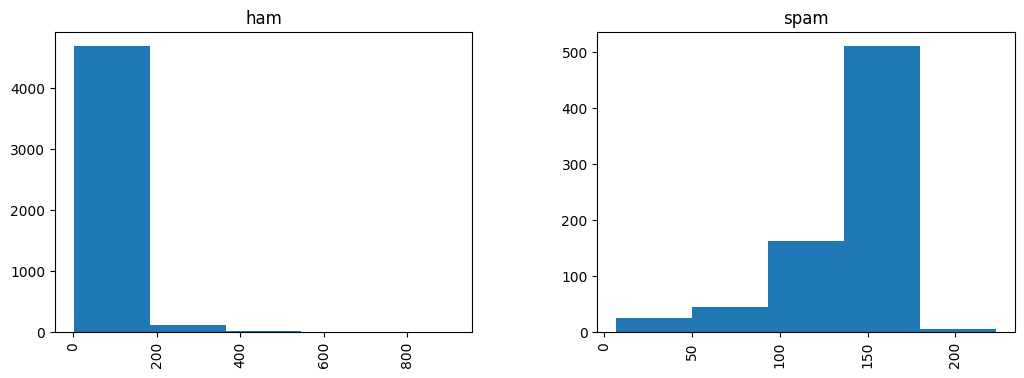

In [104]:
messages.hist(column = 'length', by ='label',figsize=(12,4), bins = 5)

In [105]:
# Get all the ham and spam emails
ham_msg = messages[messages.label =='ham']
spam_msg = messages[messages.label=='spam']
# Create numpy list to visualize using wordcloud
ham_msg_text = " ".join(ham_msg.sms.to_numpy().tolist())
spam_msg_text = " ".join(spam_msg.sms.to_numpy().tolist())

In [60]:
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['sms'][i])
    review = review.lower()
    review = review.split()

    review = [wordnet.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [109]:
labels = messages.groupby('label').mean()
labels

<ipython-input-109-d540d692a688>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  labels = messages.groupby('label').mean()


,length
label,
ham,71.44829
spam,137.98929


In [62]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray()

In [63]:
X.shape

(5572, 7098)

In [64]:
y=pd.get_dummies(messages['label'])
y=y.iloc[:,1].values

In [65]:
y.shape

(5572,)

In [66]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [86]:
# Training model using Naive bayes classifier

from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X_train, y_train)
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
y_pred=spam_detect_model.predict(X_test)

In [87]:
from sklearn.metrics import classification_report, confusion_matrix

In [88]:
print (confusion_matrix(y_test, y_pred))
print (classification_report(y_test, y_pred))

[[936  19]
 [  8 152]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       955
           1       0.89      0.95      0.92       160

    accuracy                           0.98      1115
   macro avg       0.94      0.97      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [89]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
smote= SMOTE(random_state = 2)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 587
Before OverSampling, counts of label '0': 3870 

After OverSampling, the shape of train_X: (7740, 7098)
After OverSampling, the shape of train_y: (7740,) 

After OverSampling, counts of label '1': 3870
After OverSampling, counts of label '0': 3870


In [93]:
# Training model using Naive bayes classifier
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X_train_res, y_train_res.ravel())
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
y_pred=spam_detect_model.predict(X_test)

In [94]:
print (confusion_matrix(y_test, y_pred))
print (classification_report(y_test, y_pred))

[[928  27]
 [ 13 147]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       955
           1       0.84      0.92      0.88       160

    accuracy                           0.96      1115
   macro avg       0.92      0.95      0.93      1115
weighted avg       0.97      0.96      0.96      1115

